<a href="https://colab.research.google.com/github/milindparitshinde/AI/blob/main/NN/CNN/CAR_LICENSE_PREDICTION/VGG16_Layer.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import os

In [ ]:
img_path = '/content/drive/MyDrive/Quant Masters /Ml/Project/Data_Set/images'
images = os.listdir(img_path)
images.sort()

xml_path = '/content/drive/MyDrive/Quant Masters /Ml/Project/Data_Set/annotations'
xml = os.listdir('/content/drive/MyDrive/Quant Masters /Ml/Project/Data_Set/annotations')
xml.sort()

In [ ]:
print(images)
print(xml)

['Cars0.png', 'Cars1.png', 'Cars10.png', 'Cars100.png', 'Cars101.png', 'Cars102.png', 'Cars103.png', 'Cars104.png', 'Cars105.png', 'Cars106.png', 'Cars107.png', 'Cars108.png', 'Cars109.png', 'Cars11.png', 'Cars110.png', 'Cars111.png', 'Cars112.png', 'Cars113.png', 'Cars114.png', 'Cars115.png', 'Cars116.png', 'Cars117.png', 'Cars118.png', 'Cars119.png', 'Cars12.png', 'Cars120.png', 'Cars121.png', 'Cars122.png', 'Cars123.png', 'Cars124.png', 'Cars125.png', 'Cars126.png', 'Cars127.png', 'Cars128.png', 'Cars129.png', 'Cars13.png', 'Cars130.png', 'Cars131.png', 'Cars132.png', 'Cars133.png', 'Cars134.png', 'Cars135.png', 'Cars136.png', 'Cars137.png', 'Cars138.png', 'Cars139.png', 'Cars14.png', 'Cars140.png', 'Cars141.png', 'Cars142.png', 'Cars143.png', 'Cars144.png', 'Cars145.png', 'Cars146.png', 'Cars147.png', 'Cars148.png', 'Cars149.png', 'Cars15.png', 'Cars150.png', 'Cars151.png', 'Cars152.png', 'Cars153.png', 'Cars154.png', 'Cars155.png', 'Cars156.png', 'Cars157.png', 'Cars158.png', 'Car

In [ ]:
import numpy as np
import cv2
X=[]

for image in images:
  img = cv2.imread(img_path+'/'+image)
  img = cv2.resize(img, (200,200))
  X.append(np.array(img))

In [ ]:
X = np.array(X)

In [ ]:
X.shape

(433, 200, 200, 3)

In [ ]:
type(X)

numpy.ndarray

In [ ]:
from bs4 import BeautifulSoup

y=[]
for xml_file in xml:
  with open(xml_path + '/' + xml_file) as f:
    xml_data = f.read()
  xml_data = BeautifulSoup(xml_data, 'xml')

  width = int(xml_data.find('width').text)
  height = int(xml_data.find('height').text)

  xMax = int(xml_data.find('xmax').text)/(width/200)
  xMin = int(xml_data.find('xmin').text)/(width/200)
  yMax = int(xml_data.find('ymax').text)/(height/200)
  yMin = int(xml_data.find('ymin').text)/(height/200)

  y.append([int(xMax), int(yMax), int(xMin), int(yMin)])
  f.close()

In [ ]:
y = np.array(y)

In [ ]:
y.shape

(433, 4)

In [ ]:
type(y)

numpy.ndarray

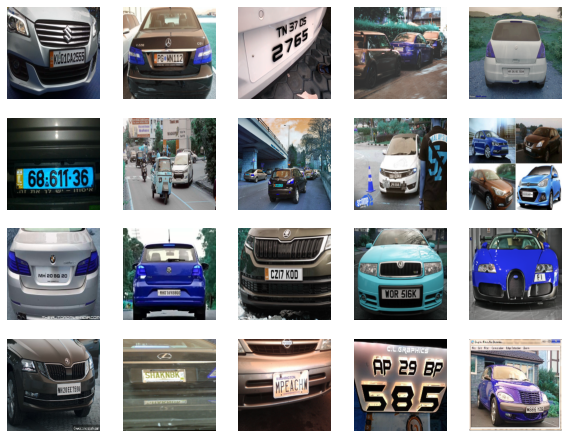

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10,20))
for i in range(0,20) :
    plt.subplot(10,5,i+1)
    plt.axis('off')
    plt.imshow(X[i])

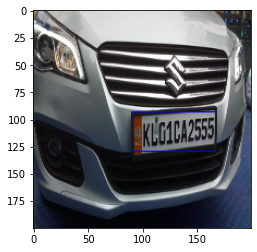

In [ ]:
image = cv2.rectangle(X[0],(y[0][0],y[0][1]),(y[0][2],y[0][3]),(0, 0, 255))
plt.imshow(image)
plt.show()

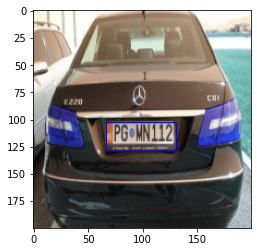

In [ ]:
image = cv2.rectangle(X[1],(y[1][0],y[1][1]),(y[1][2],y[1][3]),(0, 0, 255))
plt.imshow(image)
plt.show()

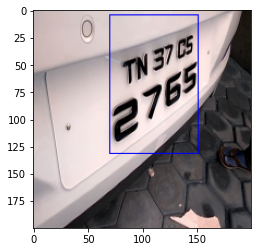

In [ ]:
image = cv2.rectangle(X[2],(y[2][0],y[2][1]),(y[2][2],y[2][3]),(0, 0, 255))
plt.imshow(image)
plt.show()

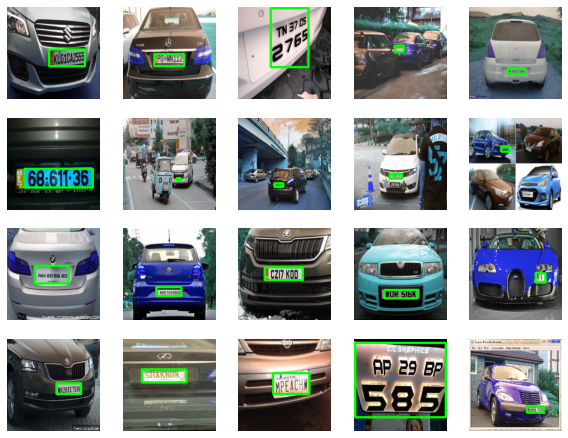

In [ ]:
plt.figure(figsize=(10,20))
for i in range(0,20) :
    plt.subplot(10,5,i+1)
    img = cv2.rectangle(X[i],(y[i][0],y[i][1]),(y[i][2],y[i][3]),(0, 255, 0),3)
    plt.axis('off')
    plt.imshow(img)

In [ ]:
# Normalization

X = X/255
y = y/255

In [ ]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(X,y,
                                                    test_size=0.2,
                                                    random_state=2022)

In [ ]:
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(346, 200, 200, 3)
(87, 200, 200, 3)
(346, 4)
(87, 4)


# VGG16

In [ ]:
from keras.models import Sequential
from keras.layers import Dense, Flatten
from keras.applications.vgg16 import VGG16

In [ ]:
vgg_model = Sequential()
vgg_model.add(VGG16(include_top=False, input_shape=(200,200,3)))
vgg_model.add(Flatten())
vgg_model.add(Dense(128, activation="relu"))
vgg_model.add(Dense(128, activation="relu"))
vgg_model.add(Dense(64, activation="relu"))
vgg_model.add(Dense(4, activation="sigmoid"))

vgg_model.layers[-6].trainable = False

58900480/58889256 [==============================] - 0s 0us/step


In [ ]:
vgg_model.compile(loss='mean_squared_error', optimizer='adam', metrics=['accuracy'])

In [ ]:
train = vgg_model.fit(x_train, y_train, validation_data=(x_test, y_test), epochs=50, batch_size=32, verbose=1)

Epoch 1/50
11/11 [==============================] - 152s 14s/step - loss: 0.0443 - accuracy: 0.3699 - val_loss: 0.0108 - val_accuracy: 0.6092
Epoch 2/50
11/11 [==============================] - 151s 14s/step - loss: 0.0121 - accuracy: 0.5925 - val_loss: 0.0108 - val_accuracy: 0.6897
Epoch 3/50
11/11 [==============================] - 151s 14s/step - loss: 0.0064 - accuracy: 0.7341 - val_loss: 0.0073 - val_accuracy: 0.7011
Epoch 4/50
11/11 [==============================] - 151s 14s/step - loss: 0.0042 - accuracy: 0.7803 - val_loss: 0.0054 - val_accuracy: 0.8161
Epoch 5/50
11/11 [==============================] - 151s 14s/step - loss: 0.0027 - accuracy: 0.8671 - val_loss: 0.0056 - val_accuracy: 0.8506
Epoch 6/50
11/11 [==============================] - 150s 14s/step - loss: 0.0016 - accuracy: 0.8960 - val_loss: 0.0048 - val_accuracy: 0.8046
Epoch 7/50
11/11 [==============================] - 150s 14s/step - loss: 0.0013 - accuracy: 0.9046 - val_loss: 0.0044 - val_accuracy: 0.8506
Epoch 

In [ ]:
scores = vgg_model.evaluate(x_test, y_test, verbose=0)
print("Score : %.2f%%" % (scores[1]*100))

Score : 85.06%


In [ ]:
def plot_scores(train) :
    accuracy = train.history['accuracy']
    val_accuracy = train.history['val_accuracy']
    epochs = range(len(accuracy))
    plt.plot(epochs, accuracy, 'b', label='Score apprentissage')
    plt.plot(epochs, val_accuracy, 'r', label='Score validation')
    plt.title('Scores')
    plt.legend()
    plt.show()

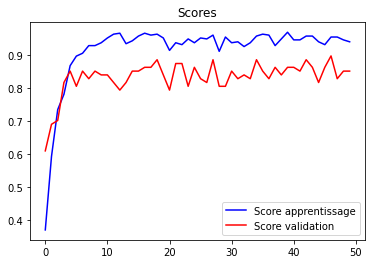

In [ ]:
plot_scores(train)

In [ ]:
 y_cnn = vgg_model.predict(x_test)

In [ ]:
y_cnn.shape

(87, 4)

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping i

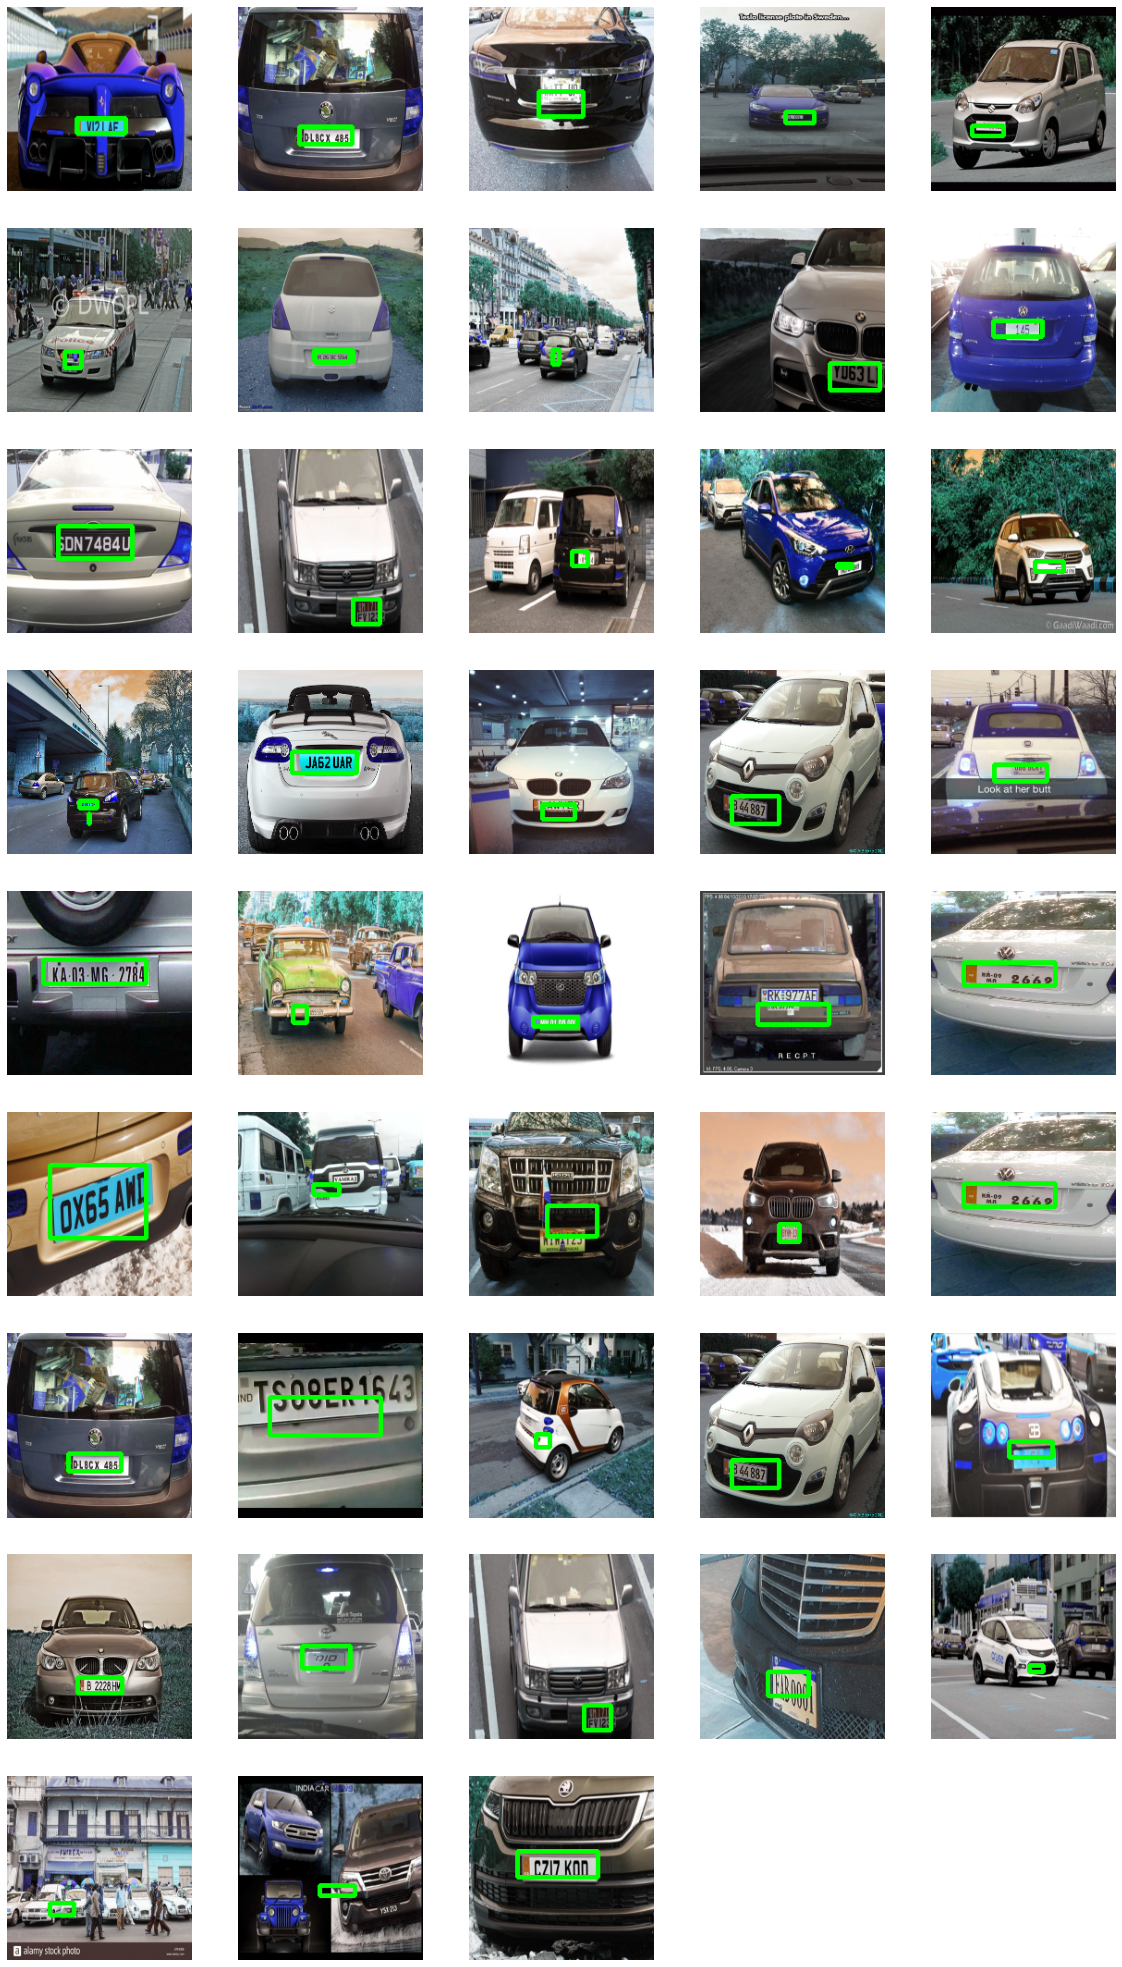

In [ ]:
plt.figure(figsize=(20,40))
for i in range(0,43) :
    plt.subplot(10,5,i+1)
    plt.axis('off')
    ny = y_cnn[i]*255
    image = cv2.rectangle(x_test[i],(int(ny[0]),int(ny[1])),(int(ny[2]),int(ny[3])),(0, 255, 0),3)
    plt.imshow(image)